## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def remove_ouliers(data,column,remove=False):
    """
        We should pass True to remove only if we are looking in target variable
    """
    q3=data[column].quantile(.75)
    q1=data[column].quantile(.25)
    iqr=q3-q1
    #iqr=iqr+0.5*iqr
    upper = q3 +1.5*iqr
    lower = q1 - 1.5*iqr
    upper_pre=upper
    lower_pre=lower
    while True:
        print("(lower,upper) : ",(lower,upper))
        if remove:
            index_column = data[ data[column] >= upper].index
            data.drop(index_column , inplace=True)
        else:
            data[column]=np.where(data[column]>upper,np.nan,data[column])
        q3=data[column].quantile(.75)
        q1=data[column].quantile(.25)
        iqr=q3-q1
        #print("(lower,upper,IQR) :",(q1,q3,iqr))
        #iqr=iqr+0.5*iqr
        upper = q3 +1.5*iqr
        lower = q1 - 1.5*iqr
        if upper == upper_pre and lower==lower_pre:
            break
        else:
            upper_pre=upper
            lower_pre=lower

    return data

## Data

In [4]:
train_data=pd.read_csv("../data/Train.csv")
test_data=pd.read_csv("../data/Test.csv")
print(train_data.shape)

(8523, 12)


In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
print("shape of train data is ",train_data.shape)
print("shape of test data is ",test_data.shape)

shape of train data is  (8523, 12)
shape of test data is  (5681, 11)


In [11]:
train_data.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Exploratory Data Analysis

In [12]:
columns_name=train_data.columns.to_list()
columns_name

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Count'>

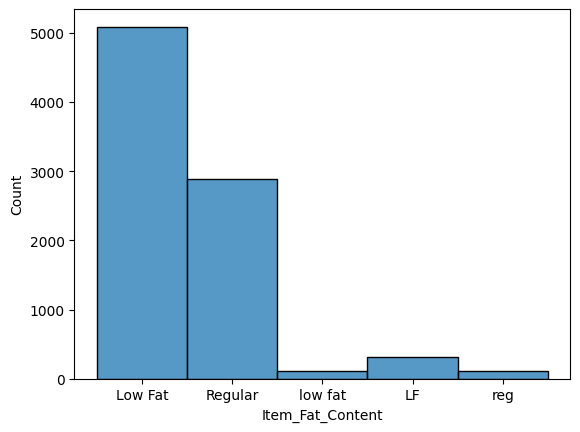

In [13]:

sns.histplot(data=train_data,x="Item_Fat_Content")


<p> 
 So as we see, we have problems with names. "Regular" is writing also as <b>reg</b> and the same for "LF" and Low Fat and low fat, are all equals. We need to fixe this problem First
</p>

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Count'>

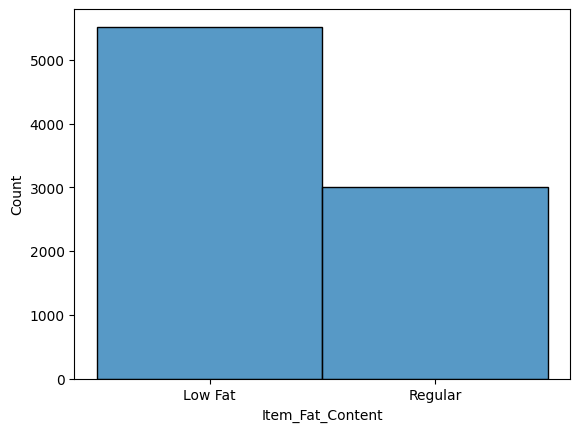

In [14]:
train_data.loc[ train_data["Item_Fat_Content"] == "low fat" , "Item_Fat_Content"] = "Low Fat"
train_data.loc[ train_data["Item_Fat_Content"] == "LF" , "Item_Fat_Content"] = "Low Fat"
train_data.loc[ train_data["Item_Fat_Content"] == "reg" , "Item_Fat_Content"] = "Regular"
sns.histplot(data=train_data,x="Item_Fat_Content")


In [15]:
columns_name

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

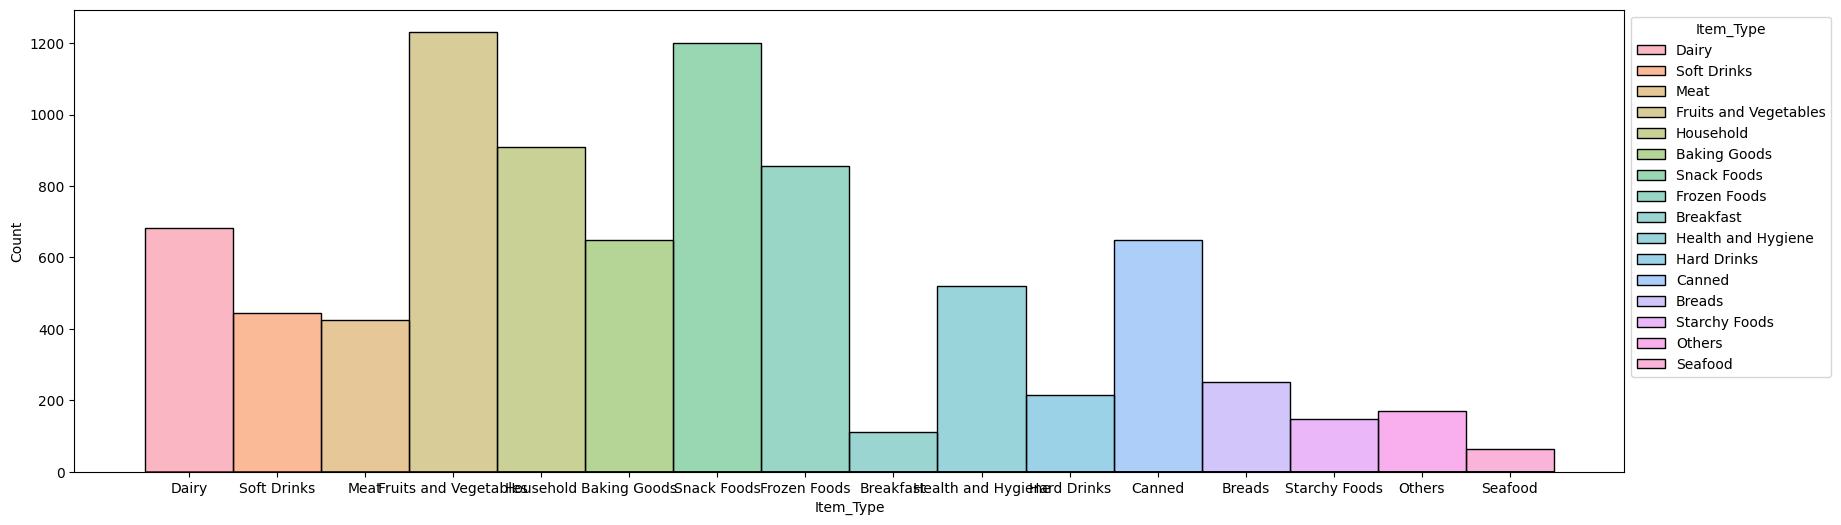

In [16]:
plt.figure(figsize=(20,6))
ax=sns.histplot(data=train_data,x="Item_Type",kde=True,hue="Item_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


We have the main problem here is the balance data.

Seafood as category is too small for oour model. We should remove it or add more data for this category

As we can see in the next output cell:

In [17]:
print(train_data["Item_Type"].unique())
print("-"*40)
print(train_data["Item_Type"].value_counts())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


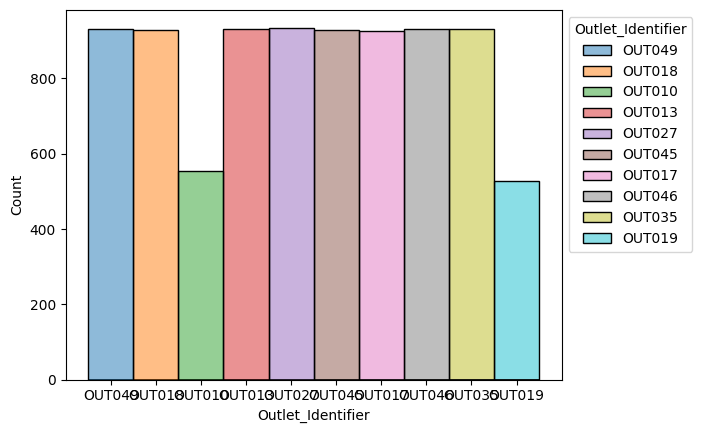

In [18]:
#plt.figure(figsize=(6,3))
ax=sns.histplot(data=train_data,x="Outlet_Identifier",kde=True,hue="Outlet_Identifier")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

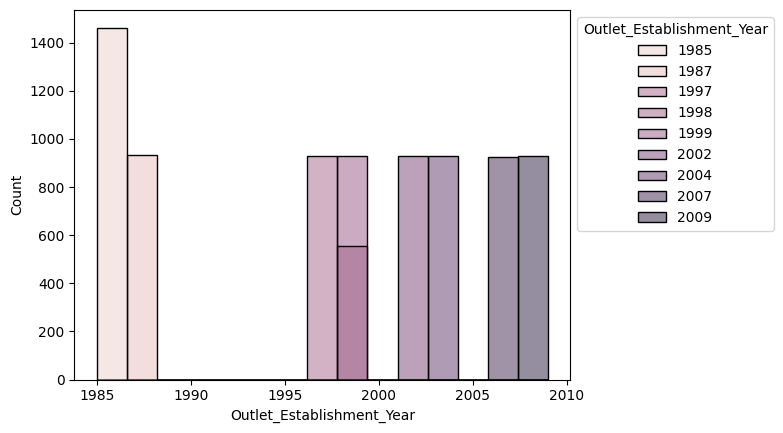

In [19]:
ax=sns.histplot(data=train_data,x="Outlet_Establishment_Year",kde=True,hue="Outlet_Establishment_Year")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


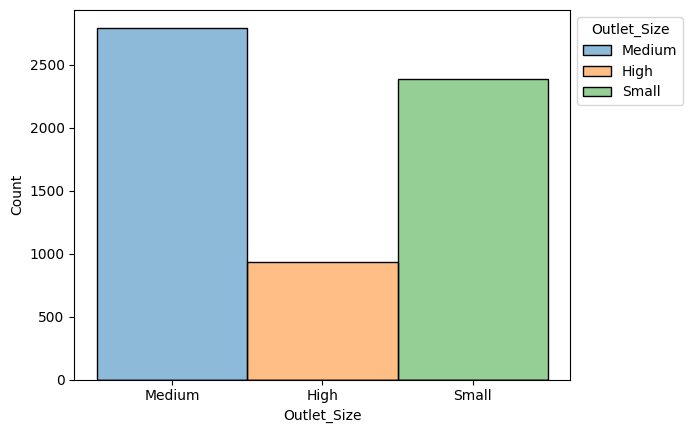

In [20]:

ax=sns.histplot(data=train_data,x="Outlet_Size",hue="Outlet_Size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Size.value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


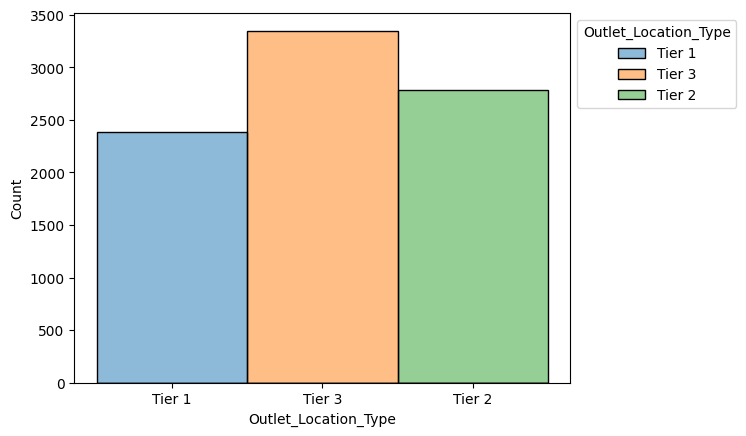

In [21]:

ax=sns.histplot(data=train_data,x="Outlet_Location_Type",hue="Outlet_Location_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Location_Type.value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


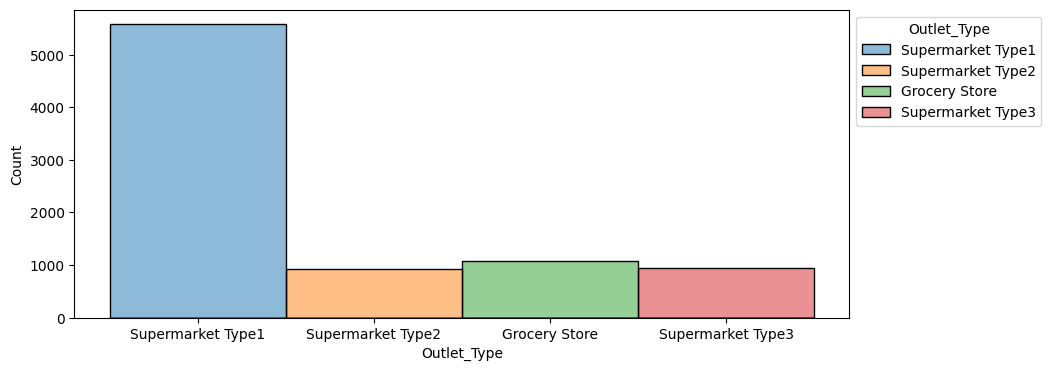

In [22]:
plt.figure(figsize=(10,4))
ax=sns.histplot(data=train_data,x="Outlet_Type",hue="Outlet_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Type.value_counts())

Here we have also problem of balance data

### Outliers

(lower,upper) :  (-2566.3261, 6501.8699)
(lower,upper) :  (-2469.7851000000005, 6278.8269)
(lower,upper) :  (-2441.8215, 6226.8945)
(lower,upper) :  (-2442.071175, 6220.652625)


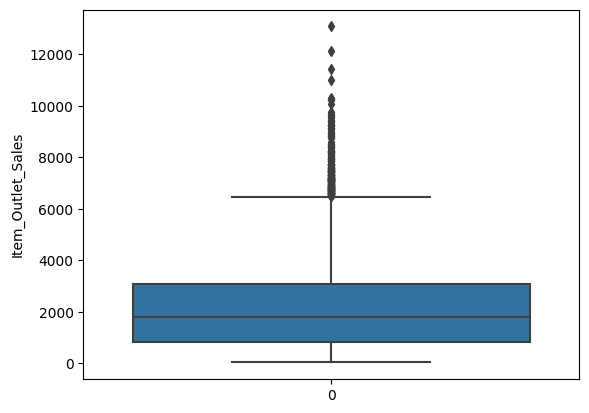

In [23]:
# let'si first check for target variable
sns.boxplot(train_data["Item_Outlet_Sales"])
plt.ylabel("Item_Outlet_Sales")
train_data=remove_ouliers(train_data,"Item_Outlet_Sales",True)

In [24]:
train_data_num=train_data.select_dtypes("float64")
train_data_cat=train_data.select_dtypes("object")
print(train_data_num.head())
print("-----------"*10)
print(train_data_cat.head())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0         9.30         0.016047  249.8092          3735.1380
1         5.92         0.019278   48.2692           443.4228
2        17.50         0.016760  141.6180          2097.2700
3        19.20         0.000000  182.0950           732.3800
4         8.93         0.000000   53.8614           994.7052
--------------------------------------------------------------------------------------------------------------
  Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet

#### Histogram for all numerical variables and target variable

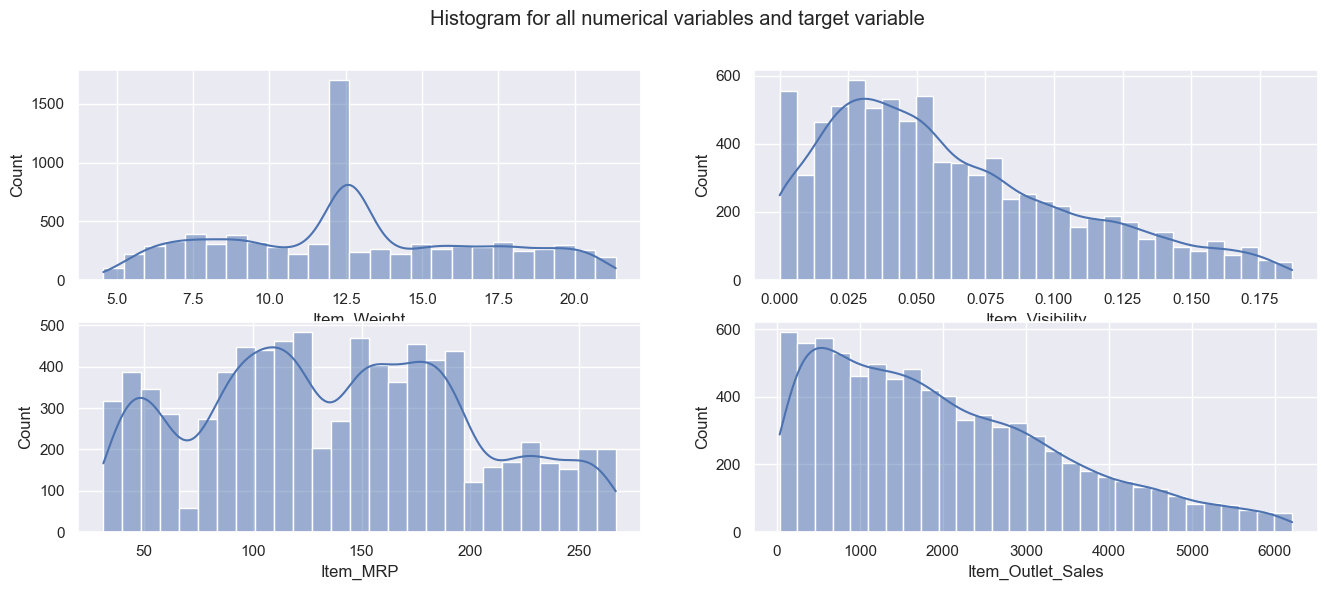

In [129]:

rows=4//2
cols=2
columns=train_data_num.columns.to_list()
figure, axes = plt.subplots(rows, cols, figsize=(16,6))
figure.suptitle('Histogram for all numerical variables and target variable')
k=0
for i in range(rows):
    for j in range(cols):
        sns.histplot(ax=axes[i,j],data=train_data_num,x=columns[k],kde=True)
        k=k+1
plt.show()

As we can see the data is not uniform, so we will predict with this data and then we are going to make some transformation on it and predict again

#### Remove Outliers

(lower,upper) :  (-3.34375, 28.966250000000002)


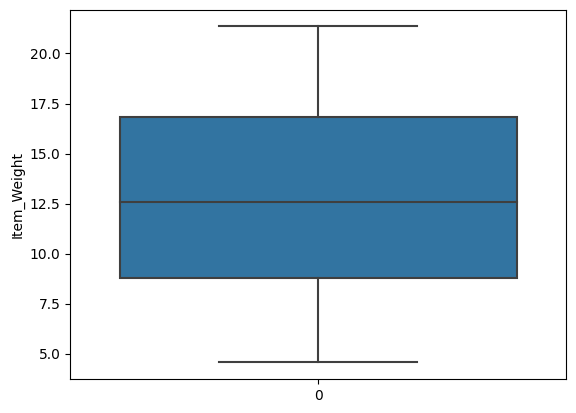

(lower,upper) :  (-0.07548733524999998, 0.19789034074999998)
(lower,upper) :  (-0.07235822725, 0.19211285875)
(lower,upper) :  (-0.07209268699999999, 0.191594345)
(lower,upper) :  (-0.072086542, 0.191583428)


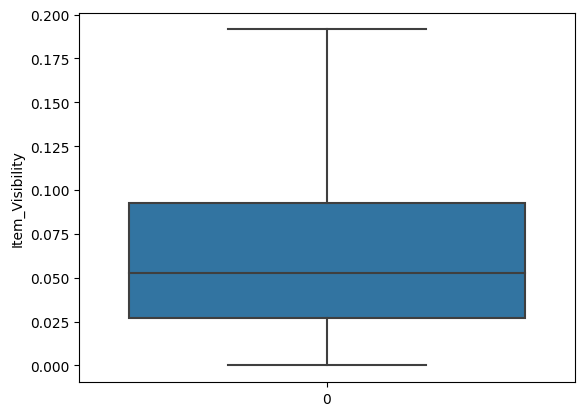

(lower,upper) :  (-42.675049999999985, 318.38334999999995)


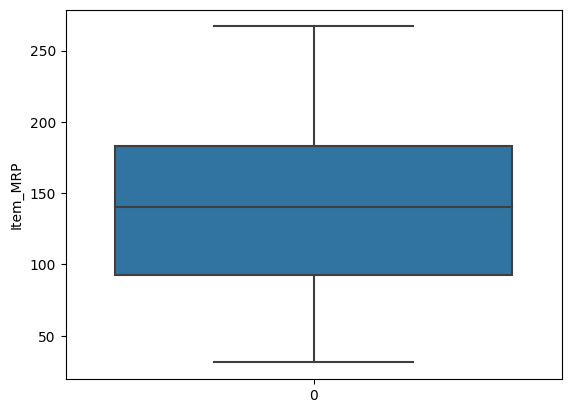

(lower,upper) :  (-2442.071175, 6220.652625)


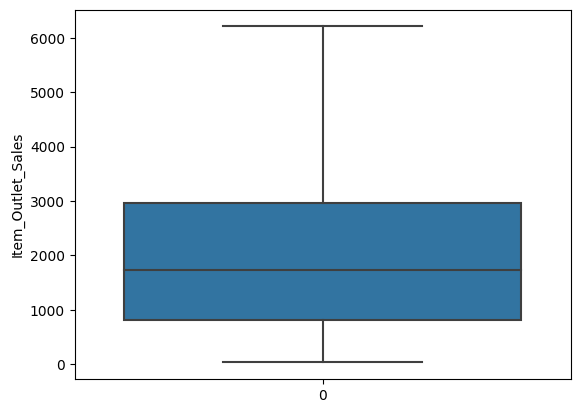

In [25]:
for col in train_data_num:
    if col=="Item_Outlet_Sales":
        train_data_num=remove_ouliers(train_data_num,col,remove=True)
    else:
        train_data_num=remove_ouliers(train_data_num,col)
    sns.boxplot(train_data_num[col])
    plt.ylabel(str(col))
    plt.show()


In [26]:
train_data_num.isnull().sum()

Item_Weight          1347
Item_Visibility       154
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

### Missing Values

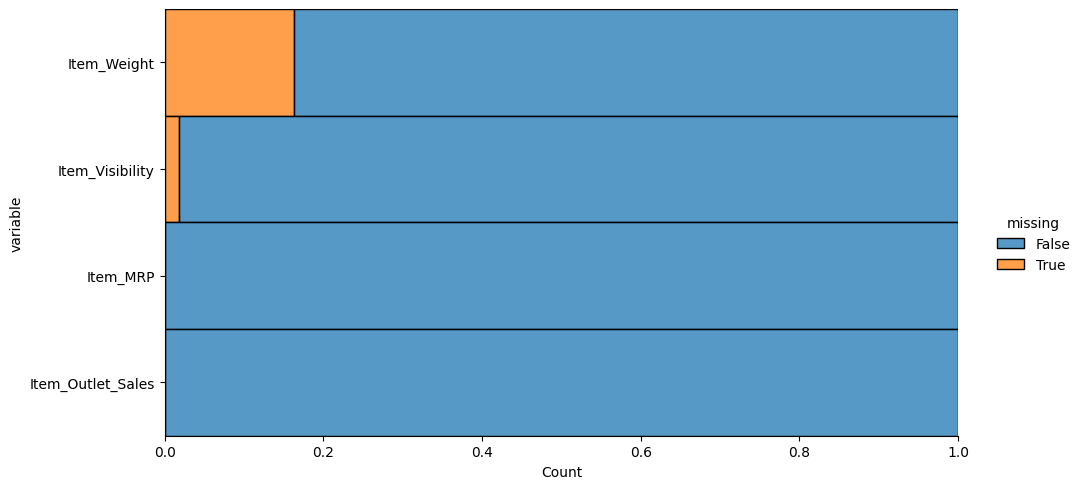

In [27]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

#### Fill Nan Values with Median

In [28]:
train_data_num["Item_Visibility"]=train_data_num["Item_Visibility"].fillna(train_data_num["Item_Visibility"].median())
train_data_num["Item_Weight"]=train_data_num["Item_Weight"].fillna(train_data_num["Item_Weight"].median())

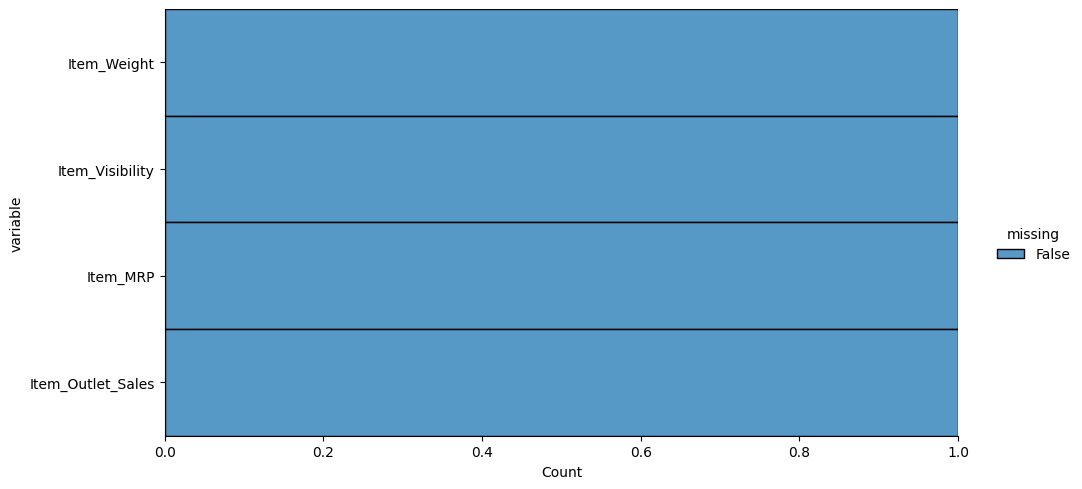

In [29]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

(lower,upper) :  (-0.9000000000000004, 26.300000000000004)


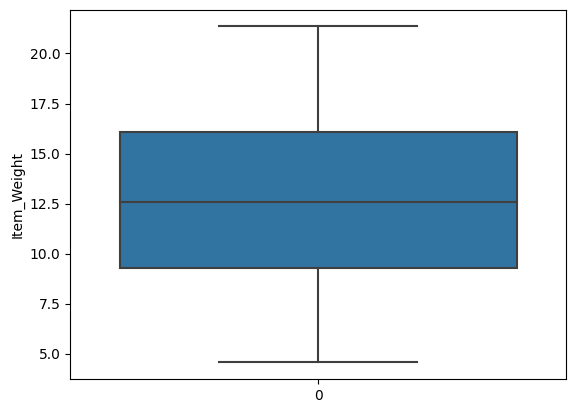

(lower,upper) :  (-0.069543013, 0.18798313700000002)
(lower,upper) :  (-0.06932590899999998, 0.187519269)
(lower,upper) :  (-0.069131606, 0.187166946)
(lower,upper) :  (-0.0691400175, 0.18715904249999998)


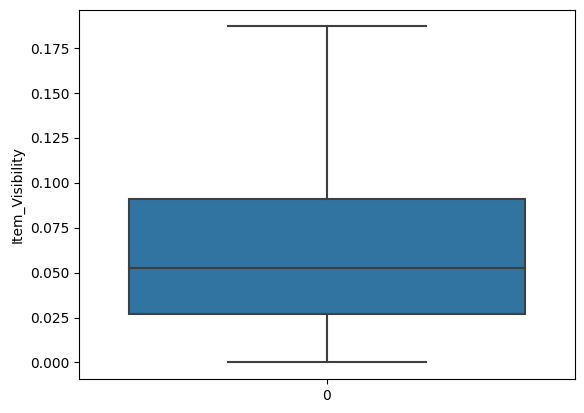

(lower,upper) :  (-42.675049999999985, 318.38334999999995)


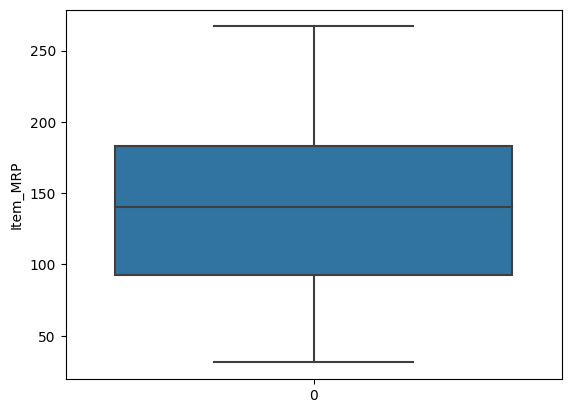

(lower,upper) :  (-2442.071175, 6220.652625)


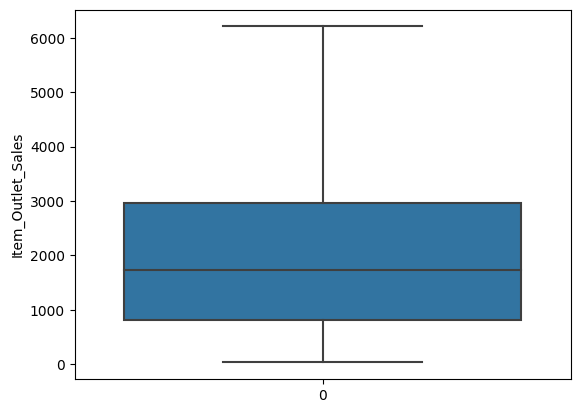

In [30]:
for col in train_data_num:
    if col=="Item_Outlet_Sales":
        train_data_num=remove_ouliers(train_data_num,col,remove=True)
    else:
        train_data_num=remove_ouliers(train_data_num,col)
    sns.boxplot(train_data_num[col])
    plt.ylabel(str(col))
    plt.show()

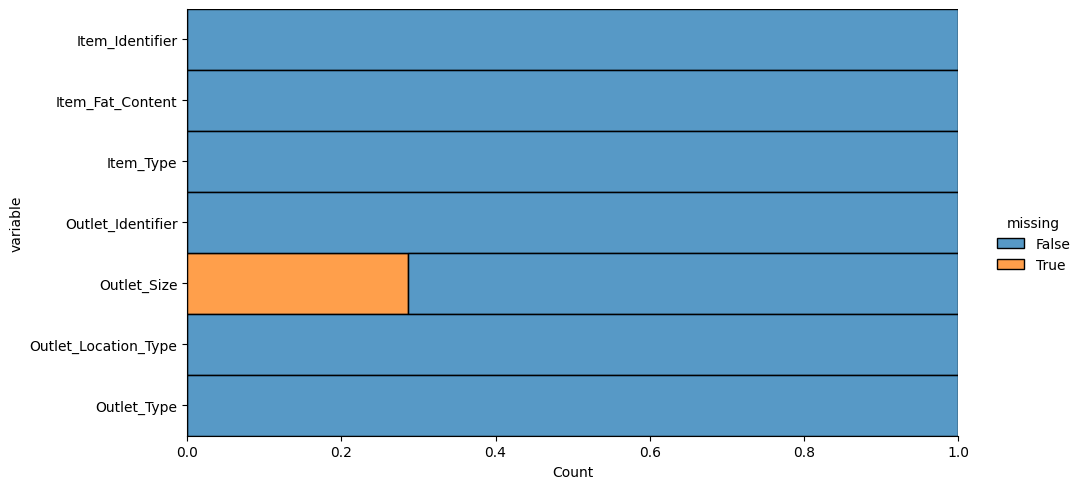

In [31]:
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

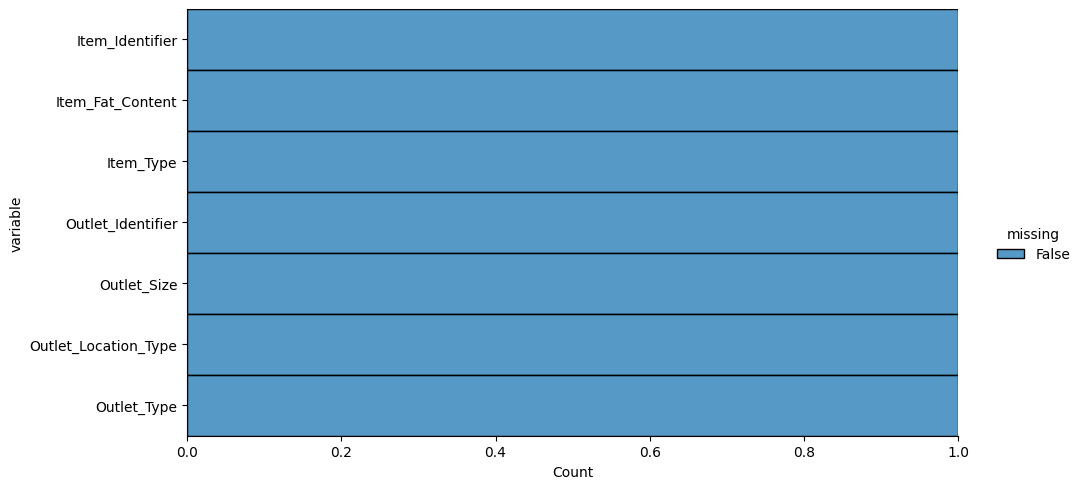

In [32]:
train_data_cat = train_data_cat.fillna(train_data_cat.mode().iloc[0])
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

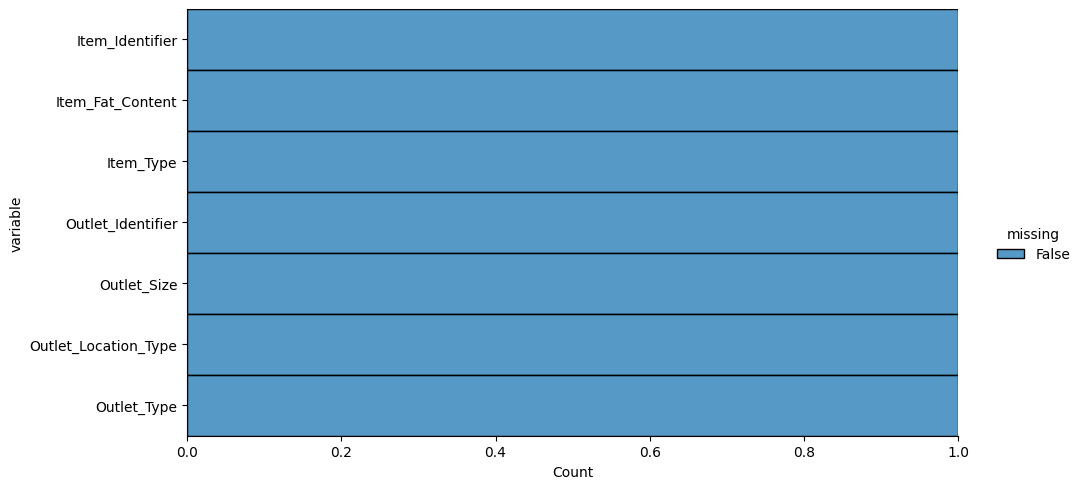

In [33]:
data=pd.concat([train_data_cat,train_data_num],axis=1,join="outer")
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

C:\Users\Elkharroubi\AppData\Local\Temp\ipykernel_15584\2416425088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)


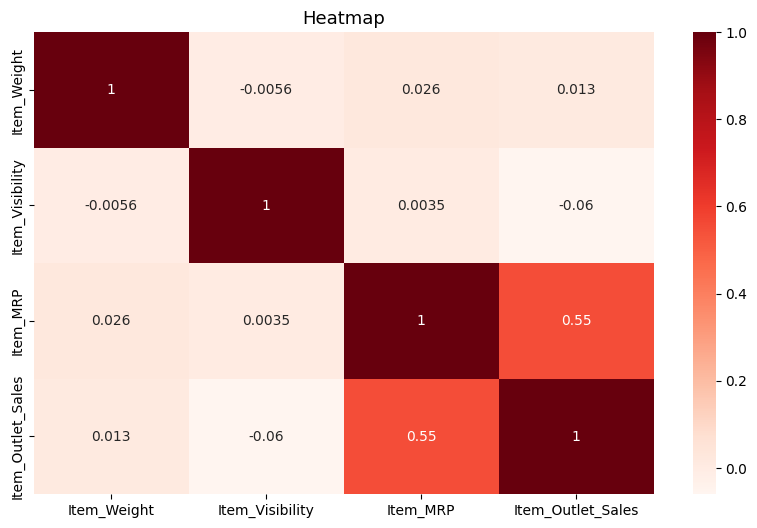

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',
         fontsize=13)
plt.show()

### Categorical encoding

In [35]:
train_data_cat.shape

(8290, 7)

In [36]:
train_data_cat.columns.to_list()[1:]

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

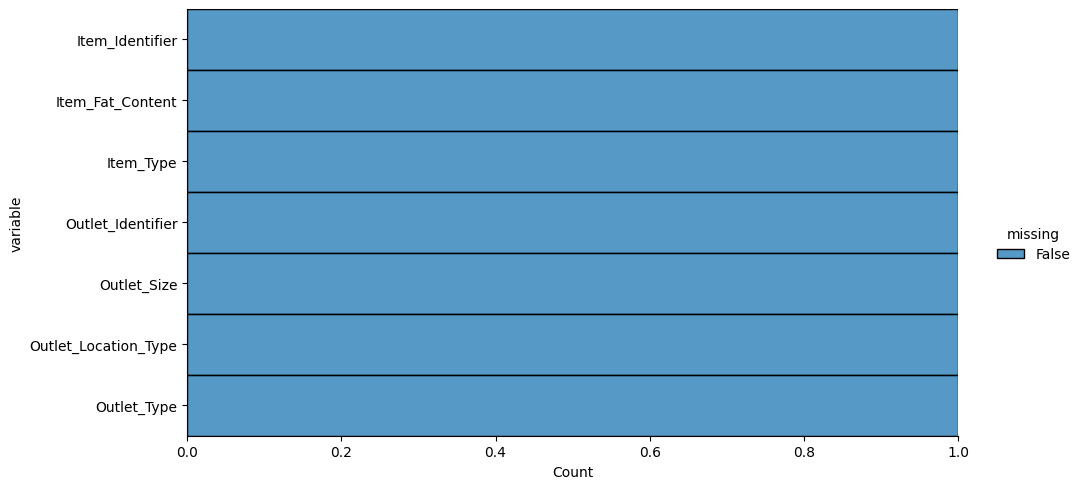

In [37]:
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [38]:
# we must remove first colum as product identifier
train_data_cata_encoded=pd.get_dummies(train_data_cat.iloc[:,1:], columns=train_data_cat.columns.to_list()[1:])
train_data_cata_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Fusion of data

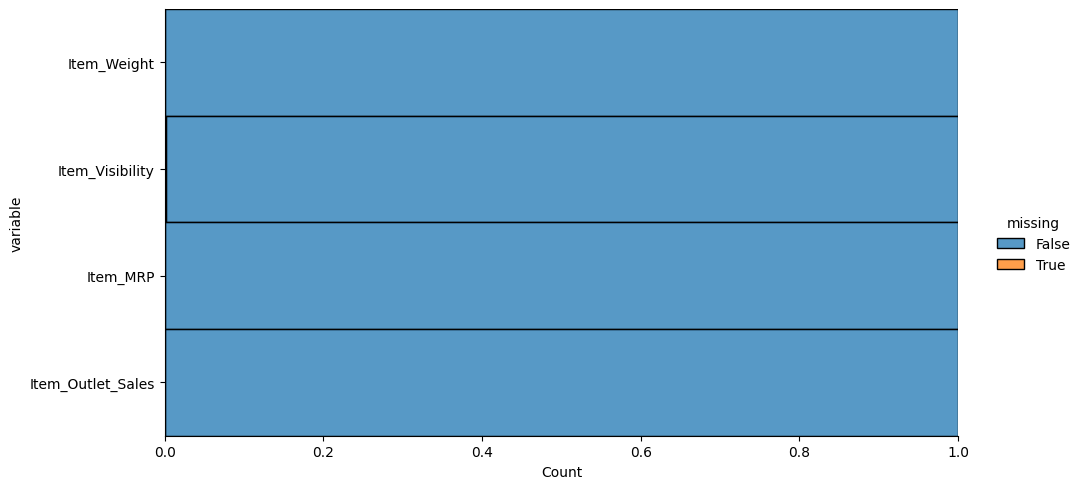

In [39]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [40]:
train_data_num["Item_Visibility"]=train_data_num["Item_Visibility"].fillna(train_data_num["Item_Visibility"].median())

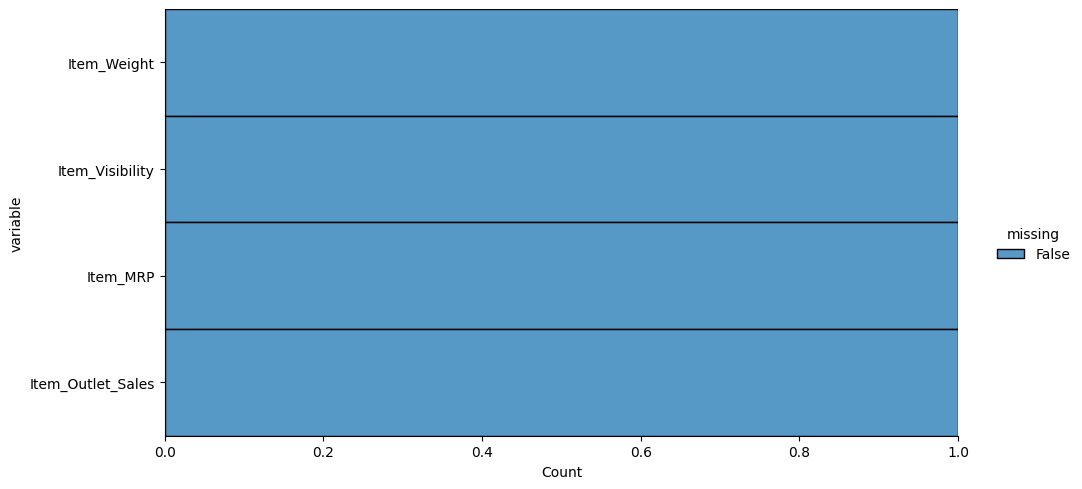

In [41]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [42]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")

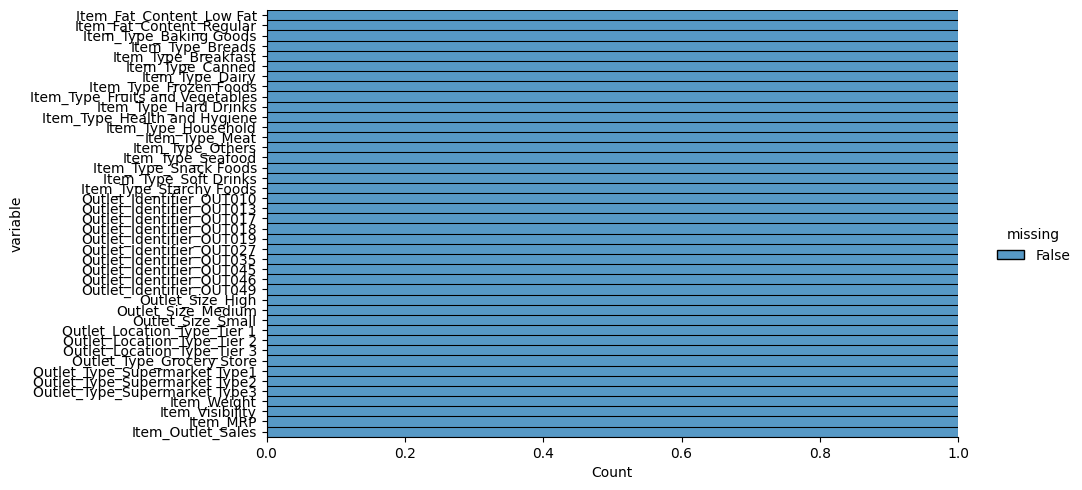

In [43]:
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [44]:
data.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9.30,0.016047,249.8092,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,5.92,0.019278,48.2692,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,17.50,0.016760,141.6180,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,19.20,0.000000,182.0950,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,8.93,0.000000,53.8614,994.7052


In [45]:
data.shape

(8290, 42)

# Buid Models

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [662]:

def error_graph(y_test, y_predict):
    errors=metrics.mean_absolute_error(y_predict,y_test,multioutput="raw_values")
    return errors


def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    print("MAE ",metrics.mean_absolute_error(predictions,y_test))
    print("MSE",metrics.mean_squared_error(predictions,y_test))
    print("RMSE ",np.sqrt(metrics.mean_squared_error(predictions,y_test)))
    
    return metrics.mean_absolute_error(predictions,y_test)

In [582]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:data.shape[1]-1], data["Item_Outlet_Sales"], test_size=0.3, random_state=200)

### 1. Linear Regression

In [207]:
reg = LinearRegression().fit(X_train, y_train)

In [267]:
evaluate(reg,X_test,y_test)

Model Performance
Average Error: 747.9816 degrees.
Accuracy = 6.31%.
MAE  747.9816498337641
MSE 934753.6610829242
RMSE  966.8265930780577


6.313515247508988

### regularized linear regression

#### Ridge regression

In [211]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
evaluate(ridge,X_test,y_test)
print("**"*30)
evaluate(ridge,X_test,y_test)


Model Performance
Average Error: 747.9573 degrees.
Accuracy = 6.33%.
MAE  747.9572942240623
MSE 934721.2739228111
RMSE  966.8098437246133
************************************************************
Model Performance
Average Error: 747.9573 degrees.
Accuracy = 6.33%.
MAE  747.9572942240623
MSE 934721.2739228111
RMSE  966.8098437246133


6.333839804642068

#### Lasso regression

In [212]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.4)
lasso.fit(X_train, y_train)
evaluate(lasso,X_test,y_test)

print("**"*30)
evaluate(lasso,X_test,y_test)

Model Performance
Average Error: 747.5612 degrees.
Accuracy = 6.38%.
MAE  747.5612148655888
MSE 933865.8033274511
RMSE  966.3673231889886
************************************************************
Model Performance
Average Error: 747.5612 degrees.
Accuracy = 6.38%.
MAE  747.5612148655888
MSE 933865.8033274511
RMSE  966.3673231889886


6.377640607578414

### RandomForest

In [470]:
from sklearn.ensemble import RandomForestRegressor

In [475]:
random_cl = RandomForestRegressor(n_estimators=100)
random_cl=random_cl.fit(X_train,y_train)
evaluate(random_cl,X_test,y_test)

Model Performance
Average Error: 711.4872 degrees.
Accuracy = 43.53%.
MAE  711.4872067084841
MSE 960148.8266097698
RMSE  979.871841931265


43.52820554183362

In [215]:
from sklearn.model_selection import cross_val_score
random_cl = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(random_cl, X_train, y_train, cv=5)
scores

array([0.51568471, 0.56156676, 0.56881235, 0.54222839, 0.52198435])

In [216]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.54 accuracy with a standard deviation of 0.02


### xgboost

In [150]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [290]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 20, seed = 123)
# Fitting the model
xgb_r=xgb_r.fit(X_train, y_train)
 # Predict the model
evaluate(xgb_r,X_test,y_test)

Model Performance
Average Error: 686.0639 degrees.
Accuracy = 44.01%.
MAE  686.063914836031
MSE 883450.8538720964
RMSE  939.9206636052303


44.01304316963376

#### Fine Tuning

In [221]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
print(rf_random.best_estimator_)

In [269]:
evaluate(rf_random,X_test,y_test)

Model Performance
Average Error: 713.4695 degrees.
Accuracy = 38.06%.
MAE  713.4695016728541
MSE 912153.7086743236
RMSE  955.0673843631787


38.060954064861185

# Transormation

In [508]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# for cox box and Yeo-Johnson transform transformation
from sklearn.preprocessing import power_transform

Text(0.5, 1.0, 'Target test variable with box cox transormation')

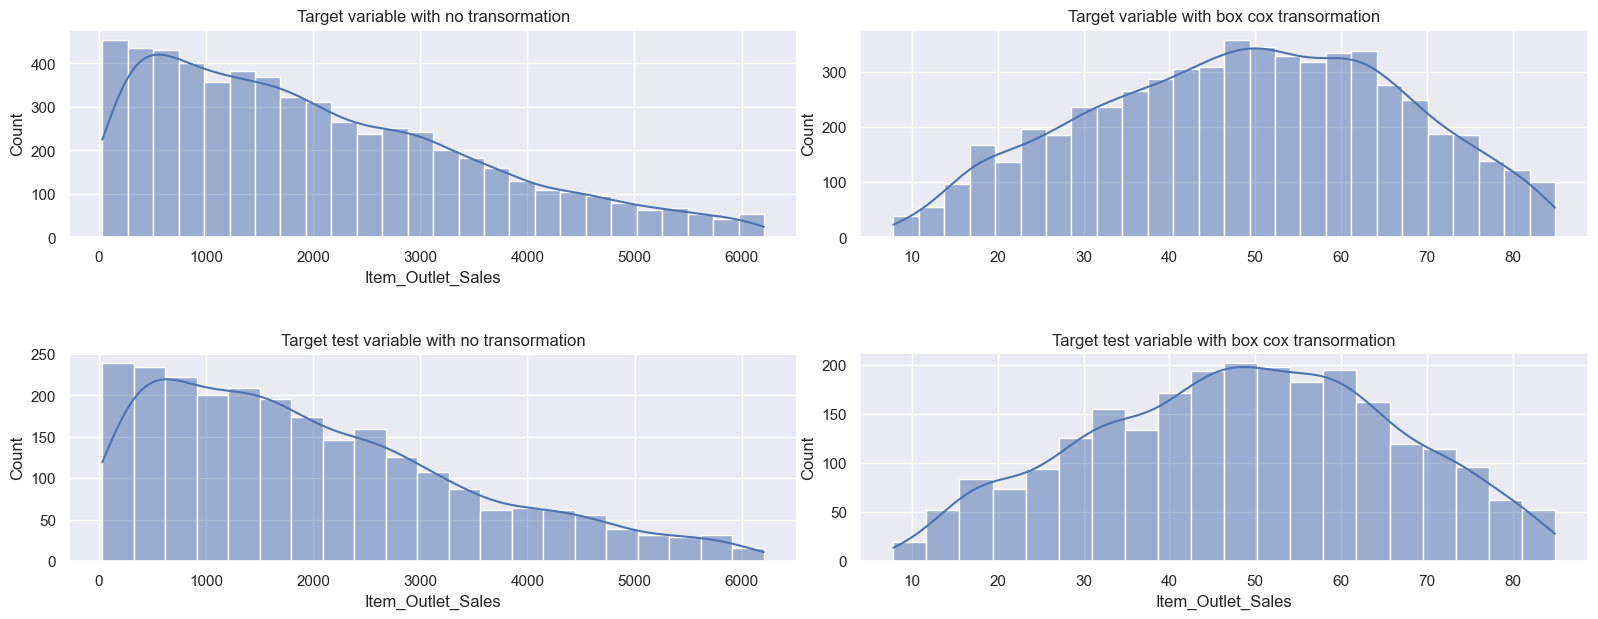

In [583]:

rows=2;cols=2
figure, axes = plt.subplots(rows, cols, figsize=(16,6))
plt.tight_layout(h_pad=5)

y_train_boxcox,best_lmbda= stats.boxcox(y_train)
sns.histplot(ax=axes[0,0],data=y_train, kde=True) 
axes[0,0].set_title("Target variable with no transormation")

sns.histplot(ax=axes[0,1],data=y_train_boxcox, kde=True)  
axes[0,1].set_title("Target variable with box cox transormation")


sns.histplot(ax=axes[1,0],data=y_test, kde=True) 
axes[1,0].set_title("Target test variable with no transormation")

y_test_boxcox= stats.boxcox(y_test,best_lmbda)
sns.histplot(ax=axes[1,1],data=y_test_boxcox, kde=True)  
axes[1,1].set_title("Target test variable with box cox transormation")

In [584]:
random_cl=random_cl.fit(X_train,y_train_boxcox)
evaluate(random_cl,X_test,y_test_boxcox)

Model Performance
Average Error: 8.1444 degrees.
Accuracy = 80.46%.
MAE  8.14439651450491
MSE 108.8229209000599
RMSE  10.431822510954637


80.4562608555992

In [585]:
y_train_boxcox=power_transform(y_train.to_numpy().reshape(-1,1)).flatten()

y_test_boxcox=power_transform(y_test.to_numpy().reshape(-1,1)).flatten()

random_cl=random_cl.fit(X_train,y_train_boxcox)

evaluate(random_cl,X_test,y_test_boxcox)

Model Performance
Average Error: 0.4640 degrees.
Accuracy = -2640.25%.
MAE  0.46400462934546927
MSE 0.3521069462047595
RMSE  0.5933860010185271


-2640.253652292448

#### Other variables of type numerical (non cotegorical)

In [631]:
X_train_float=X_train.select_dtypes("float64")
columns=X_train_float.columns.to_list()

data_transform=power_transform(X_train_float.to_numpy())
X_train_float_tr=pd.DataFrame(data_transform,columns=columns)

X_train_uint8=X_train.select_dtypes(np.uint8)
X_train_uint8.reset_index(drop=True, inplace=True)

X_train_float_tr.reset_index(drop=True, inplace=True)

objs=[X_train_uint8,X_train_float_tr]
X_train_transform=pd.concat(objs, axis=1, join='outer')

# For X_test

X_test_float=X_test.select_dtypes("float64")
data_transform=power_transform(X_test_float.to_numpy())

X_test_uint8=X_test.select_dtypes(np.uint8)

X_test_float_tr=pd.DataFrame(data_transform,columns=columns)

X_test_uint8.reset_index(drop=True, inplace=True)
X_test_float_tr.reset_index(drop=True, inplace=True)

objs=[X_test_uint8,X_test_float_tr]
X_test_transform=pd.concat(objs, axis=1, join='outer')


In [634]:
random_cl=random_cl.fit(X_train_transform,y_train_boxcox)
evaluate(random_cl,X_test_transform,y_test_boxcox)

Model Performance
Average Error: 0.4633 degrees.
Accuracy = -2844.55%.
MAE  0.46334964468343726
MSE 0.35075776524893537
RMSE  0.5922480605700076


-2844.545750762997

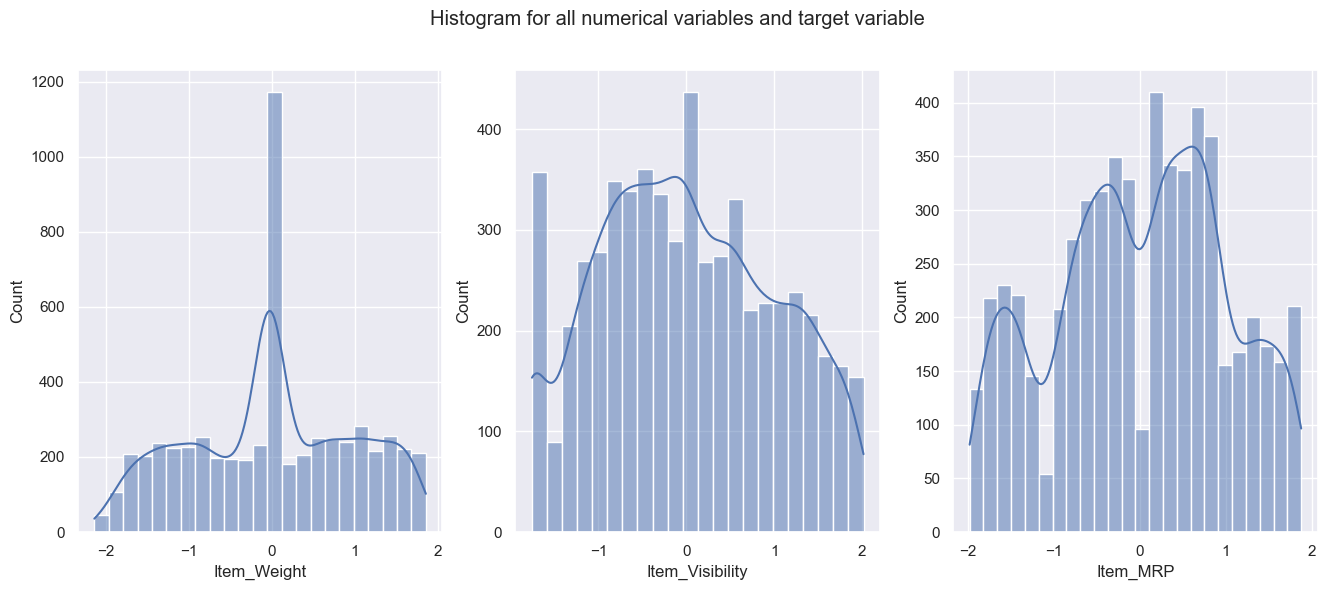

In [655]:

rows=1
cols=3
columns=X_train_transform.select_dtypes("float64").columns.to_list()
columns
figure, axes = plt.subplots(rows, cols, figsize=(16,6))
figure.suptitle('Histogram for all numerical variables and target variable')
k=0
for i in range(rows):
    for j in range(cols):
        sns.histplot(ax=axes[j],data=X_train_transform,x=columns[j],kde=True)
plt.show()

## Feature Enginnering

In [ ]:
from sklearn.decomposition import PCA
result=[]
for i in range(5,41):
    pca = PCA(n_components=i)
    pca.fit(X_train_transform)
    X_train_transform_pca=pca.fit_transform(X_train_transform,y_train_boxcox)
    X_test_transform_pca=pca.transform(X_test_transform)
    random_cl=random_cl.fit(X_train_transform_pca,y_train_boxcox)
    result.append(evaluate(random_cl,X_test_transform_pca,y_test_boxcox))


Text(0, 0.5, 'Mean Absolute Error ')

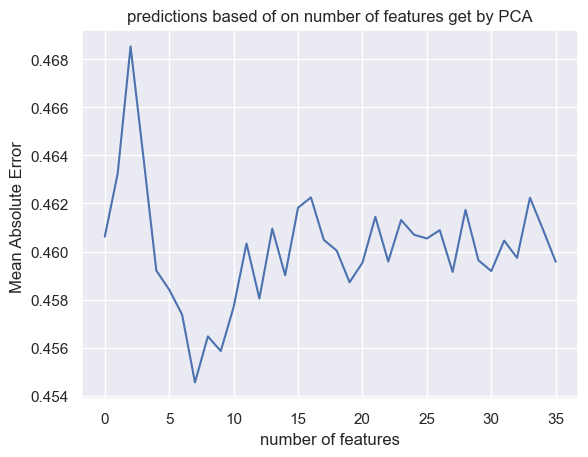

In [677]:
plt.plot(range(len(result)),result)
plt.title("predictions based of on number of features get by PCA")
plt.xlabel("number of features")
plt.ylabel("Mean Absolute Error ")

In [686]:
result[7]

0.4545544265274551

In [694]:
pca = PCA(n_components=8)
pca.fit(X_train_transform)
X_train_transform_pca=pca.fit_transform(X_train_transform,y_train_boxcox)
X_test_transform_pca=pca.transform(X_test_transform)
random_cl=random_cl.fit(X_train_transform_pca,y_train_boxcox)
evaluate(random_cl,X_test_transform_pca,y_test_boxcox)

Model Performance
Average Error: 0.4634 degrees.
Accuracy = -2313.49%.
MAE  0.4633508213199722
MSE 0.3503946867232368
RMSE  0.591941455486298


0.4633508213199722

# Deep Neural Network

In [420]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import datetime

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss="mean_absolute_error", optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [424]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor="mean_absolute_error", verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [426]:
history=NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test,y_test), callbacks=callbacks_list)
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("mean absolute error")
plt.plot(history.epoch,np.array(history.history["mean_absolute_error"]),label="mean_absolute_error")
plt.plot(history.epoch,np.array(history.history["val_mean_absolute_error"]),label="val_mean_absolute_error")
plt.legend()


182/182 [==============================] - 2s 10ms/step - loss: 668.8640 - mean_absolute_error: 668.8640 - val_loss: 699.9637 - val_mean_absolute_error: 699.9637
Epoch 78/500
182/182 [==============================] - 2s 9ms/step - loss: 669.2912 - mean_absolute_error: 669.2912 - val_loss: 689.9612 - val_mean_absolute_error: 689.9612
Epoch 79/500
182/182 [==============================] - 2s 9ms/step - loss: 667.7498 - mean_absolute_error: 667.7498 - val_loss: 685.3469 - val_mean_absolute_error: 685.3469
Epoch 80/500
182/182 [==============================] - 1s 6ms/step - loss: 668.6508 - mean_absolute_error: 668.6508 - val_loss: 691.1218 - val_mean_absolute_error: 691.1218
Epoch 81/500
182/182 [==============================] - 1s 5ms/step - loss: 668.8262 - mean_absolute_error: 668.8262 - val_loss: 684.2898 - val_mean_absolute_error: 684.2898
Epoch 82/500
182/182 [==============================] - 1s 8ms/step - loss: 666.3885 - mean_absolute_error: 666.3885 - val_loss: 715.0979 - va

KeyboardInterrupt: 

In [ ]:
# Load wights file of the best model :
wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [374]:
predictions = NN_model.predict(X_test)

78/78 [==============================] - 0s 3ms/step


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])